# importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

# 1.problem statement

### About the dataset
This input file contains the basic information (ID, age, gender, income, spending score) about the customers of a mall. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

### KMeans Clustering 
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster. Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares. In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

![k-means-clustering-algorithm-in-machine-learning](https://github.com/Yogendra-Wadkar/Telecom-Customer-Churn-Prediction-Using-Machine-Learning/assets/134367735/1459ad12-35d5-4a76-b0b9-11e8c15670bc)

# 2.Data Gathering

In [2]:
df = pd.read_csv(r"D:\Jupyter python\New dataset for pratice numpy and pandas\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3.EDA(Exploratory Data Analysis)

In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 4.Feature Engineering

In [7]:
# Finding ouliers by function

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1

lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR

ouliers = (df < lower_tail) | (df > upper_tail)
ouliers_count = ouliers.sum()
print(ouliers_count)

Age                       0
Annual Income (k$)        2
CustomerID                0
Gender                    0
Spending Score (1-100)    0
dtype: int64


In [8]:
df["Annual Income (k$)"]

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

In [9]:
# To replace outliers
def Finding_outliar1(df,columns):
    for column in columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr
            print(lower_tail1)
            print(upper_tail1)
            
            df[column] = df[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns = ["Annual Income (k$)"]

Finding_outliar1(df,columns)

-13.25
132.75


### Scaling By StandardScaler

In [10]:
df_new = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
df_new.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15.0,39
1,21,15.0,81
2,20,16.0,6
3,23,16.0,77
4,31,17.0,40


In [11]:
Std = StandardScaler()
Standard_array = Std.fit_transform(df_new)
Df_Std = pd.DataFrame(Standard_array, columns = df_new.columns)
Df_Std.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.745429,-0.434801
1,-1.281035,-1.745429,1.195704
2,-1.352802,-1.707083,-1.715913
3,-1.137502,-1.707083,1.040418
4,-0.563369,-1.668737,-0.395980


#  5.Model Training

## 2D Clustering based on Age and Spending Score

In [12]:
x = Df_Std[["Age","Spending Score (1-100)"]]
x

,Age,Spending Score (1-100)
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980
...,...,...
195,-0.276302,1.118061
196,0.441365,-0.861839
197,-0.491602,0.923953
198,-0.491602,-1.250054


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

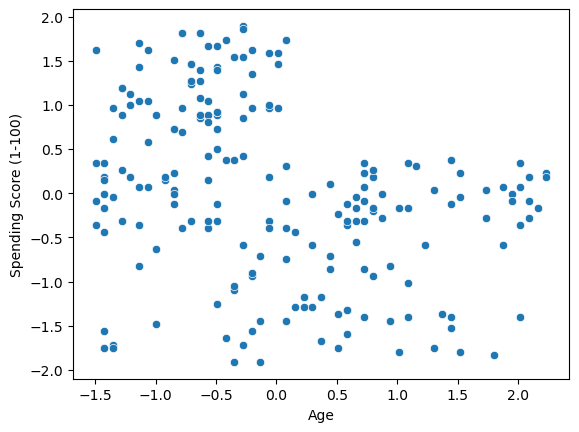

In [13]:
sns.scatterplot(x = Df_Std["Age"],y = Df_Std["Spending Score (1-100)"])

## Elbow Method To find best K

In [14]:
wcss_list = []
k = np.arange(1,10)

for i in k:
    kmeans = KMeans(i)
    kmeans.fit(x)
    kmeans.predict(x)
    wcss = kmeans.inertia_
    wcss_list.append(wcss)

In [15]:
wcss_list

[400.0,
 189.3874903399243,
 124.32628617921529,
 89.7652167658615,
 71.09364141459413,
 53.128438356294,
 45.922875914918286,
 40.135543010776836,
 34.051541307362925]

Text(0.5, 1.0, 'ELBOW METHOD')

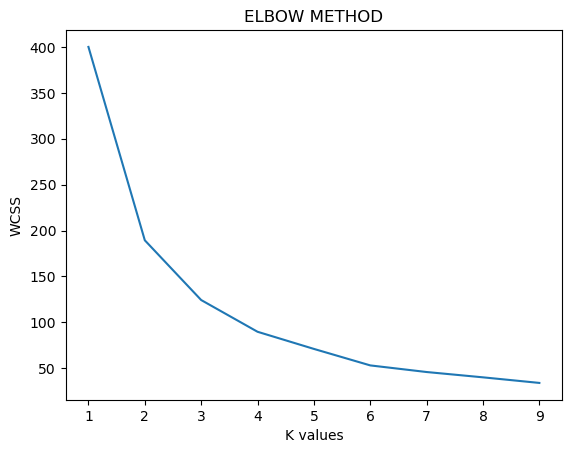

In [16]:
plt.plot(k,wcss_list)
plt.xlabel("K values")
plt.ylabel("WCSS")
plt.title("ELBOW METHOD")

### Applying KMeans for k=5

In [17]:
kmeans = KMeans(n_clusters=5)
kmeans

KMeans(n_clusters=5)

In [18]:
kmeans.fit(x)

KMeans(n_clusters=5)

In [19]:
prediction = kmeans.predict(x)
y = pd.DataFrame(prediction)

In [20]:
y

,0
0,4
1,1
2,0
3,1
4,4
...,...
195,1
196,3
197,1
198,0


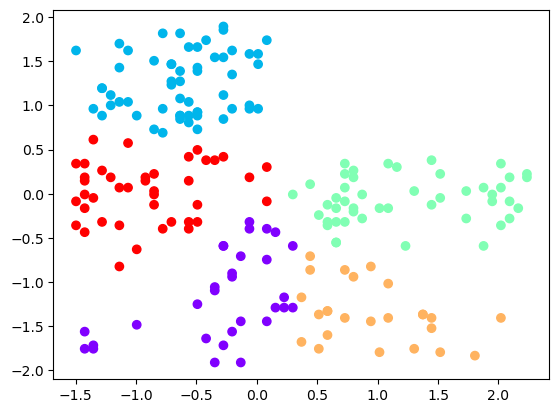

In [21]:
plt.scatter(x = Df_Std["Age"], y = Df_Std["Spending Score (1-100)"],c=prediction,cmap="rainbow")

# 2D Clustering based on Annual Income and Spending Score

In [22]:
x1 = Df_Std[["Annual Income (k$)","Spending Score (1-100)"]]
x1

,Annual Income (k$),Spending Score (1-100)
0,-1.745429,-0.434801
1,-1.745429,1.195704
2,-1.707083,-1.715913
3,-1.707083,1.040418
4,-1.668737,-0.395980
...,...,...
195,2.280936,1.118061
196,2.511014,-0.861839
197,2.511014,0.923953
198,2.769852,-1.250054


In [23]:
x1

,Annual Income (k$),Spending Score (1-100)
0,-1.745429,-0.434801
1,-1.745429,1.195704
2,-1.707083,-1.715913
3,-1.707083,1.040418
4,-1.668737,-0.395980
...,...,...
195,2.280936,1.118061
196,2.511014,-0.861839
197,2.511014,0.923953
198,2.769852,-1.250054


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

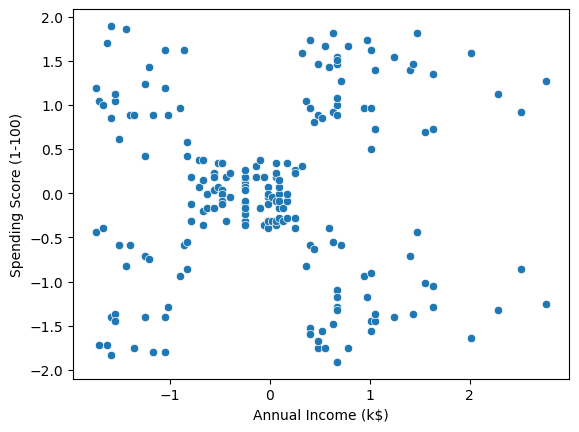

In [24]:
sns.scatterplot(x = Df_Std["Annual Income (k$)"],y = Df_Std["Spending Score (1-100)"])

## Elbow Method To find best K

In [25]:
wcss_list_2 = []
k = np.arange(1,9)

for i in k:
    k_means = KMeans(i)
    k_means.fit(x1)
    k_means.predict(x1)
    wcss_2 = k_means.inertia_
    wcss_list_2.append(wcss_2)

In [26]:
wcss_list_2

[399.99999999999994,
 269.6936173537749,
 157.1943482929361,
 108.28964151330968,
 64.76240242096694,
 54.44120166943938,
 44.42219180124724,
 36.6978769216158]

Text(0.5, 1.0, 'ELBOW METHOD')

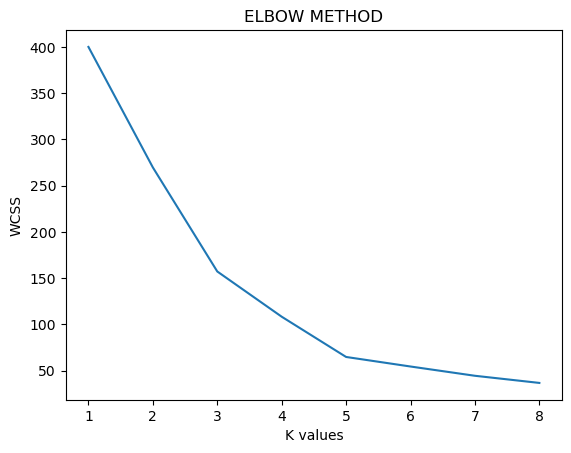

In [27]:
plt.plot(k,wcss_list_2)
plt.xlabel("K values")
plt.ylabel("WCSS")
plt.title("ELBOW METHOD")

### Applying KMeans for k=5

In [28]:
kmeans2 = KMeans(n_clusters=5)
kmeans2

KMeans(n_clusters=5)

In [29]:
kmeans2.fit(x1)

KMeans(n_clusters=5)

In [30]:
prediction2 = kmeans2.predict(x1)
y2 = pd.DataFrame(prediction2)

In [31]:
y2

,0
0,0
1,3
2,0
3,3
4,0
...,...
195,1
196,4
197,1
198,4


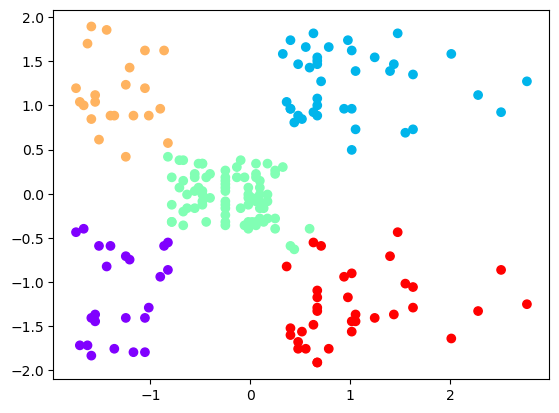

In [32]:
plt.scatter(x = Df_Std["Annual Income (k$)"], y = Df_Std["Spending Score (1-100)"],c=prediction2,cmap="rainbow")

## 3D Clustering Age , Annual Income and Spending Score

In [33]:
Df_Std

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.745429,-0.434801
1,-1.281035,-1.745429,1.195704
2,-1.352802,-1.707083,-1.715913
3,-1.137502,-1.707083,1.040418
4,-0.563369,-1.668737,-0.395980
...,...,...,...
195,-0.276302,2.280936,1.118061
196,0.441365,2.511014,-0.861839
197,-0.491602,2.511014,0.923953
198,-0.491602,2.769852,-1.250054


In [34]:
Data = Df_Std[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Choose the number of clusters
k = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(Data)

# Add cluster labels to your DataFrame
Df_Std['Cluster'] = kmeans.labels_

# View the resulting DataFrame
print(Df_Std)


          Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   -1.424569           -1.745429               -0.434801        0
1   -1.281035           -1.745429                1.195704        0
2   -1.352802           -1.707083               -1.715913        0
3   -1.137502           -1.707083                1.040418        0
4   -0.563369           -1.668737               -0.395980        0
..        ...                 ...                     ...      ...
195 -0.276302            2.280936                1.118061        2
196  0.441365            2.511014               -0.861839        1
197 -0.491602            2.511014                0.923953        2
198 -0.491602            2.769852               -1.250054        2
199 -0.635135            2.769852                1.273347        2

[200 rows x 4 columns]


In [35]:
print("Inertia:", kmeans.inertia_)

Inertia: 295.18772472068514


In [36]:
silhouette_avg = silhouette_score(Data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3574111960837928


In [37]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [41]:
import plotly.express as px

# Assuming Df_Std is your DataFrame with columns: 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'
Df_Std['Cluster'] = kmeans.labels_

# Create 3D scatter plot
fig = px.scatter_3d(Df_Std, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Cluster', symbol='Cluster')

# Update layout for better visibility and set width and height
fig.update_layout(
    scene=dict(
        xaxis=dict(nticks=4, range=[min(Df_Std['Age']), max(Df_Std['Age'])]),
        yaxis=dict(nticks=4, range=[min(Df_Std['Annual Income (k$)']), max(Df_Std['Annual Income (k$)'])]),
        zaxis=dict(nticks=4, range=[min(Df_Std['Spending Score (1-100)']), max(Df_Std['Spending Score (1-100)'])]),
    ),
    width=1000,  # Set the desired width
    height=800  # Set the desired height
)

# Show the plot
fig.show()

# Conclusion

In conclusion, this project delves into the analysis of Mall Customers' data, employing the K-means clustering algorithm to unveil insightful patterns and groupings. The performed 2D and 3D clustering adds a layer of sophistication to our understanding of customer segmentation based on age, annual income, and spending score.

The acquired clusters can be leveraged to formulate targeted marketing strategies, enhancing customer engagement and fostering business growth. Your feedback on this notebook is highly valued, contributing to a collaborative journey in the realm of data science. Happy exploring!
